In [1]:
import config
import librosa
import numpy as np
import matplotlib.pyplot as plt

Generate Mel Spectrogram Image for one audio

[Text(0.5, 0, 'Time (samples)'), Text(0, 0.5, 'Amplitude')]

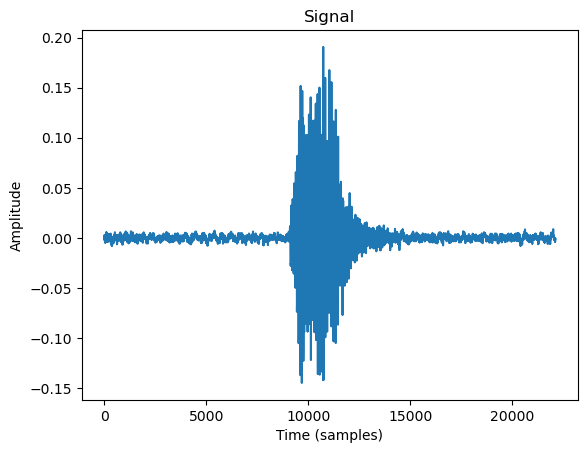

In [53]:
audio_path = '/home/kriti/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav'
workspace = config.workspace
sample_rate = config.sample_rate
n_mels = config.mel_bins

(y, fs) = librosa.core.load(audio_path, sr=sample_rate, mono=True)
fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Signal')
ax.set(xlabel='Time (samples)', ylabel='Amplitude')

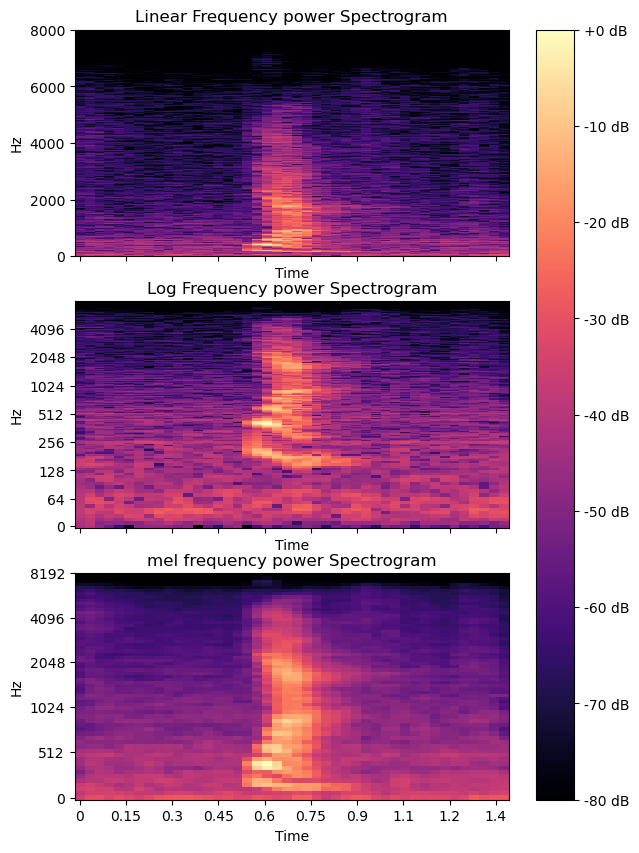

In [77]:
spec = np.abs(librosa.stft(y)) # this gives out amplitude 
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(7, 10))
power_spec = librosa.amplitude_to_db(spec, ref=np.max) # or you can do librosa.power_to_db(spec**2, ref=np.max)

img1 = librosa.display.specshow(power_spec, sr=sample_rate, x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set_title('Linear Frequency power Spectrogram')


librosa.display.specshow(power_spec, sr=sample_rate, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title('Log Frequency power Spectrogram')

melspec = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=n_mels) # this gives out power 
power_melspec = librosa.power_to_db(melspec, ref=np.max) 

librosa.display.specshow(power_melspec, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax[2])
ax[2].set_title('mel frequency power Spectrogram')
fig.colorbar(img1, ax=ax, format='%+2.0f dB')